## 🤚End-to-End Palmprint detection project

**This project is an modified implementation to Palmprint detection Research paper**
### Problem definition
> At the time of covid pandemic touch any thing is surely not save and presently in every other organization or intitute has a fingerprint or palmprint attendance system which requires you to touch the sensor and register you plam details  for proper classification But, Now there is not need for touch any sensor or placing hand on it. this model will be help you identify persons which just a image of there hand can be taken from an camera placed over system

### Data
> The Dataset for this model is collected by our team and with the help of our friends to give images of there palm print by 2 different phone cameras

**Dataset has ~30 images of each person**

### Evaluation
> The evaluation metric for this project is accuracy of multiclass classification has target to get over `90%` Accuracy

### Features
> dataset has images of 12 different persons which under each of there respective folder

In [1]:
#Check gpu usage
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os

In [3]:
# defining dataset path and All labels
DATA_PATH = "dataset"
unique_labels = os.listdir(DATA_PATH)
unique_labels

['abi',
 'adi',
 'adu',
 'akshada',
 'arin',
 'harsh',
 'piyush',
 'prince',
 'rahul',
 'rohit',
 'sahil',
 'samriddhi']

In [4]:
#Extracting image ids and image paths and labels with respect to that
image_id = []
labels = []
image_paths = []
for label in os.listdir(DATA_PATH):
    IMG_DIR = os.path.join(DATA_PATH,label)
    for image in os.listdir(IMG_DIR):
        image_id.append(image)
        labels.append(label)
        image_paths.append(os.path.join(IMG_DIR,image))

len(image_id),len(labels), len(image_paths)

(361, 361, 361)

In [5]:
image_id[:10], labels[:10], image_paths[:10]

(['IMG20230123105823.jpg',
  'IMG20230123105824.jpg',
  'IMG20230123105824_01.jpg',
  'IMG20230123105825.jpg',
  'IMG20230123105825_01.jpg',
  'IMG20230123105839.jpg',
  'IMG20230123105840.jpg',
  'IMG20230123105840_01.jpg',
  'IMG20230123105841.jpg',
  'IMG20230123105841_01.jpg'],
 ['abi', 'abi', 'abi', 'abi', 'abi', 'abi', 'abi', 'abi', 'abi', 'abi'],
 ['dataset\\abi\\IMG20230123105823.jpg',
  'dataset\\abi\\IMG20230123105824.jpg',
  'dataset\\abi\\IMG20230123105824_01.jpg',
  'dataset\\abi\\IMG20230123105825.jpg',
  'dataset\\abi\\IMG20230123105825_01.jpg',
  'dataset\\abi\\IMG20230123105839.jpg',
  'dataset\\abi\\IMG20230123105840.jpg',
  'dataset\\abi\\IMG20230123105840_01.jpg',
  'dataset\\abi\\IMG20230123105841.jpg',
  'dataset\\abi\\IMG20230123105841_01.jpg'])

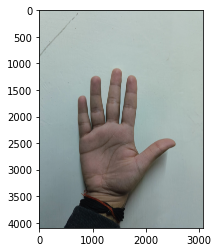

In [6]:
plt.imshow(plt.imread(image_paths[10]))

<AxesSubplot:>

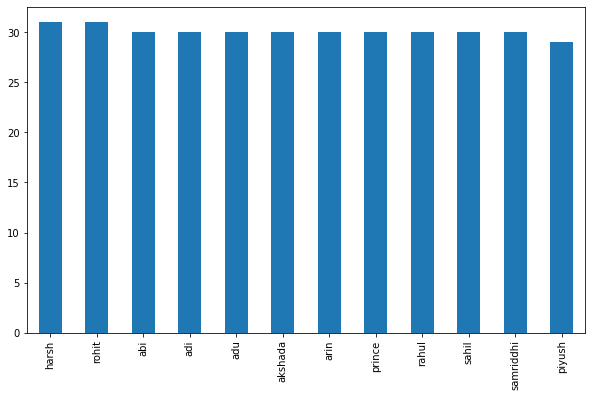

In [7]:
pd.Series(labels).value_counts().plot.bar(figsize=(10,6))

### Dataset has less images for every category, We have to apply `Data Agumentation`

To increase the number of images per category

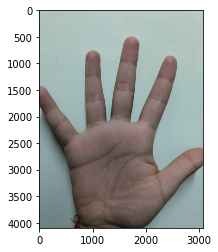

In [9]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

gen = ImageDataGenerator(rotation_range=10,
                        horizontal_flip=True,
                        brightness_range=[0.2,2])

image1 = np.expand_dims(plt.imread(image_paths[0]),0)
plt.imshow(image1[0])

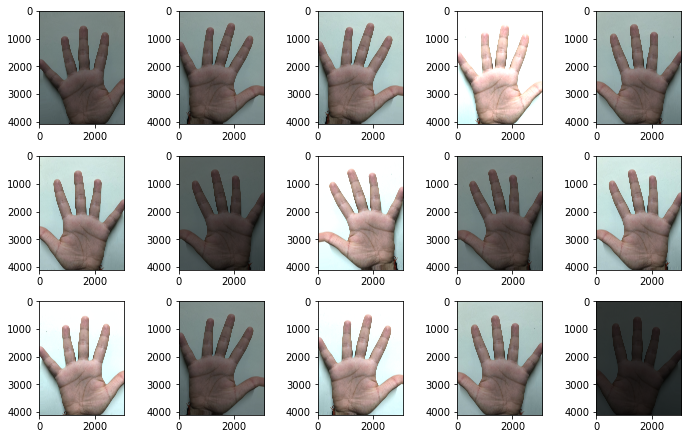

In [10]:
aug_iter = gen.flow(image1)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(20)]
plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(5,5,i)
    plt.imshow(aug_images[i])
    if i==15:
        break
plt.tight_layout()
plt.show()

In [79]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
def data_agumentation(image_paths,image_labels):
    gen = ImageDataGenerator(rotation_range=20,
                        horizontal_flip=True,
                        brightness_range=[0.2,2],
                        zoom_range=0.2,
                        width_shift_range=0.1)
    for index in range(len(image_paths)):
        image = plt.imread(image_paths[index])
        image = np.expand_dims(image,0)
        i =0
        print(f"Processing {image_labels[index]}")
        for batch in gen.flow(image,batch_size=1,save_to_dir="agumented/"+image_labels[index],
                              save_prefix=image_labels[index],save_format = 'jpg'):
            i+=1
            if i>5:
                break
            

In [18]:
%%time 

#Wall time: 1h 54min 21s 
# agumented_labels = data_agumentation(image_paths, labels)

Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing abi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adi
Processing adu
Processing adu
Processing adu
Processing adu
Processing adu
Processing adu
Processing

### Extracting ids and path os agumented labels

In [8]:
Agumented_id = []
Agumented_labels = []
Agumented_paths = []
PATH = "agumented"
for label in os.listdir(PATH):
    AUG_DIR = os.path.join(PATH,label)
    for image in os.listdir(AUG_DIR):
        Agumented_id.append(image)
        Agumented_labels.append(label)
        Agumented_paths.append(os.path.join(AUG_DIR,image))

len(Agumented_id),len(Agumented_labels), len(Agumented_paths)

(2150, 2150, 2150)

### Adding this Path_names and IDs to real images data

In [9]:
All_image_id = image_id+Agumented_id
All_labels = labels + Agumented_labels
All_image_paths = image_paths + Agumented_paths
len(All_image_id), len(All_image_paths), len(All_labels)

(2511, 2511, 2511)

In [10]:
#Creating DataFrame with final dataset
df = pd.DataFrame({"ID":All_image_id, "Paths":All_image_paths, "Labels":All_labels})
df.tail(200)

,ID,Paths,Labels
2311,sahil_0_899.jpg,agumented\sahil\sahil_0_899.jpg,sahil
2312,sahil_0_9003.jpg,agumented\sahil\sahil_0_9003.jpg,sahil
2313,sahil_0_9010.jpg,agumented\sahil\sahil_0_9010.jpg,sahil
2314,sahil_0_9059.jpg,agumented\sahil\sahil_0_9059.jpg,sahil
2315,sahil_0_9104.jpg,agumented\sahil\sahil_0_9104.jpg,sahil
...,...,...,...
2506,samriddhi_0_9614.jpg,agumented\samriddhi\samriddhi_0_9614.jpg,samriddhi
2507,samriddhi_0_9749.jpg,agumented\samriddhi\samriddhi_0_9749.jpg,samriddhi
2508,samriddhi_0_9809.jpg,agumented\samriddhi\samriddhi_0_9809.jpg,samriddhi
2509,samriddhi_0_9881.jpg,agumented\samriddhi\samriddhi_0_9881.jpg,samriddhi


## Dataset Visualization 

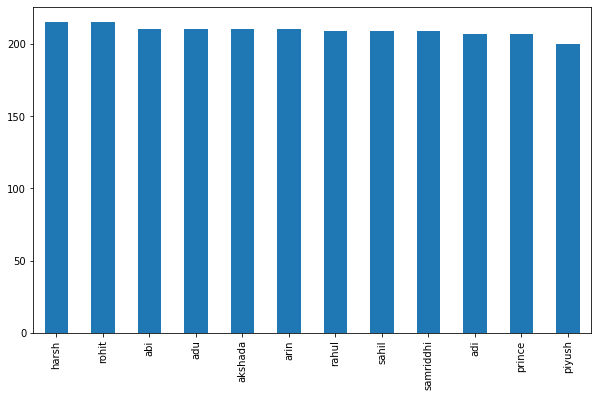

In [11]:
df.Labels.value_counts().plot.bar(figsize=(10,6));

### converting Categorical labels to Boolean values

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categorical_feature = ["Labels"]
transformer = ColumnTransformer([('encoder',encoder,categorical_feature)])
transformed_label = transformer.fit_transform(df)
transformed_label.todense().shape

(2511, 12)

In [13]:
transformed_label = transformed_label.todense()

In [14]:
transformed_label.dtype

dtype('float64')

## Preprocessing on image data

The following step we have to follow for preprocessing
1. Read an image
2. Apply Gabor filter
3. smooth an image using Median filter 
4. Segment image using an adaptive thresholding to create a binary image 
* Using Adaptive thresholding of mean
* Using Adaptive thresholding of Guassain F

## 1. Reading the image

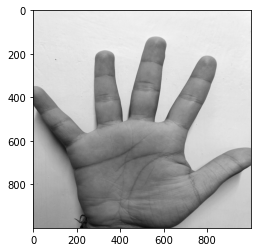

In [15]:
IMGSIZE=1000
image = cv.imread(df.Paths[0])
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image = cv.resize(image, (IMGSIZE,IMGSIZE))
plt.imshow(image,cmap='gray');

## 2. Applying Gabor filter
used for texture analysis and take motion blur in account to clear the image

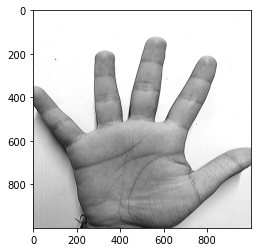

In [16]:
wavelength = 5
orientation = 0
phase_offset = 1*np.pi
sigma = 3
# This all above values are obtained through different try and error 
# And this values are depend on which type of image you are working
g_kernel = cv.getGaborKernel((wavelength, wavelength), sigma, orientation, wavelength, 0.5, 0)
#Applying filter to image 
fimage = cv.filter2D(image, cv.CV_8UC3, g_kernel)
plt.imshow(fimage,cmap='gray');

## 3. Applying Median Blue
processes the edges while removing the noise.

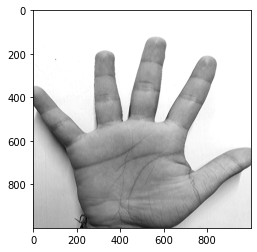

In [17]:
mblur=cv.medianBlur(fimage,5)
plt.imshow(mblur,cmap='gray');

## 4.1 Applying Adaptive Thresholding - Mean Thresholding
to segment an image by setting all pixels whose intensity values are above a threshold to a foreground value and all the remaining pixels to a background value.

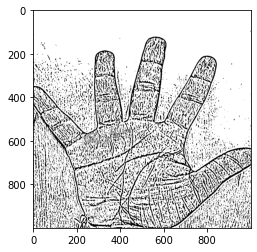

In [18]:
meanth=cv.adaptiveThreshold(mblur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
plt.imshow(meanth,cmap='gray');

## 4.2 Applying Adaptive Thresholding - Mean Thresholding
This allows for thresholding of an image whose global intensity histogram doesn't contain distinctive peaks. Adaptive Gaussian thresholding: the threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

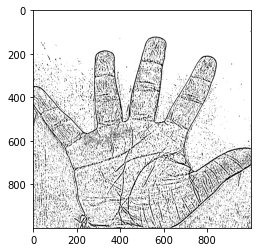

In [19]:
gaussianth=cv.adaptiveThreshold(mblur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
plt.imshow(gaussianth,cmap='gray');

In [46]:
IMGSIZE = 1000 #seting up image size
def preprocessing_image(image_path,mean_thresholding = True,wavelenght = 5, orientation= 0, phase_offset = 1*np.pi, sigma = 3):
    """
    preprocess the images using list of image paths and returns an array of filtered images
    by default Apply Mean_thresholding to images
    if mean_thresholding is set to False then Apply Guassian Thresholding
    """
    if mean_thresholding:    
        image = cv.imread(image_path)
        image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (IMGSIZE,IMGSIZE))
        #Applying Gabor filter - setup kernel for it
        g_kernel = cv.getGaborKernel((wavelength, wavelength), sigma, orientation, wavelength, 0.5, 0)
        #Applying filter to image 
        fimage = cv.filter2D(image, cv.CV_8UC3, g_kernel)
        #Apply Median Blue 
        mblur=cv.medianBlur(fimage,5)
        # Apply mean thresholding
        meanth=cv.adaptiveThreshold(mblur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
        return meanth
    else: 
        image = cv.imread(image_path)
        image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
        image = cv.resize(image, (IMGSIZE,IMGSIZE))
        #Applying Gabor filter - setup kernel for it
        g_kernel = cv.getGaborKernel((wavelength, wavelength), sigma, orientation, wavelength, 0.5, 0)
        #Applying filter to image 
        fimage = cv.filter2D(image, cv.CV_8UC3, g_kernel)
        #Apply Median Blue 
        mblur=cv.medianBlur(fimage,5)
        # Apply mean thresholding
        gaussianth=cv.adaptiveThreshold(mblur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
        return gaussianth

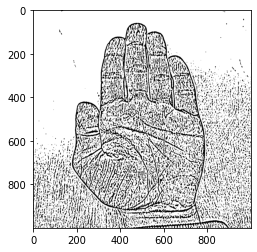

In [21]:
plt.imshow(preprocessing_image(df.Paths[50]),cmap='gray')

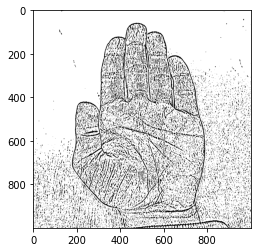

In [22]:
plt.imshow(preprocessing_image(df.Paths[50],mean_thresholding=False),cmap='gray')

## Tensorflow prefers data as tuples of tensors


### Now we've got a way to turn our data into tuples of Tensors in the form (image,label), let's make a function to turn all of our data (X, y) into batches

**for this we firstly have to process all the images, First - `Adaptive Thresholding Mean`

In [47]:
# before that we have to get all of our images in processed form
def process_images(filenames = df.Paths):
    processed_images = []
    for path in filenames: 
        processed_images.append(preprocessing_image(path))
    return processed_images

In [262]:
X = process_images()

In [263]:
len(X)

2511

In [273]:
X = tf.convert_to_tensor(X,dtype=tf.uint8)

In [267]:
y = transformed_label

In [48]:
# Function to create batch of 32
BATCH_SIZE = 32
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Create batches of data out of image (X) and label (y) pairs.
    Shuffle the data if It's training data but doesn't shuffle if it's validation data
    Also accept test data as input(no labels)
    """
    # If the data is a test data, we probably don't have label
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only file paths not labels
        data_batch = data.batch(batch_size)
        return data_batch

    # If the data is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                  tf.constant(y))) #labels
        data_batch = data.batch(batch_size)
        return data_batch
    else:
        print("Creating training data batches....")
        # Turn file paths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

        #Shuffling the pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        #Create (image,label) tuples also turn the image path into a preprocessed image
        data_batch = data.batch(batch_size)

        return data_batch

In [28]:
training_data = create_data_batches(X,y)
training_data

Creating training data batches....


<_BatchDataset element_spec=(TensorSpec(shape=(None, 1000, 1000), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 12), dtype=tf.float64, name=None))>

In [29]:
train_image,train_label = next(training_data.as_numpy_iterator())

In [30]:
training_data.element_spec

(TensorSpec(shape=(None, 1000, 1000), dtype=tf.uint8, name=None),
 TensorSpec(shape=(None, 12), dtype=tf.float64, name=None))

## Saving training Data

In [322]:
X.dtype,y.dtype

(tf.uint8, dtype('float64'))

In [320]:
import pickle
pickle.dump(X,open("X_data.pkl",'wb'))
pickle.dump(y,open("y_data.pkl",'wb'))

In [24]:
#Loading data
import pickle
X=pickle.load(open("X_data.pkl",'rb'))
y=pickle.load(open("y_data.pkl",'rb'))
X.dtype,y.dtype

(tf.uint8, dtype('float64'))

In [31]:
#Create a function for viewing images in a data batch
def show_25_images(images,labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    #set the figure
    plt.figure(figsize=(10,10))
    #Loop through 25 for displaying 25 images
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i],cmap='gray')
        # Add the image label as the title
        plt.title(unique_labels[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis('off')

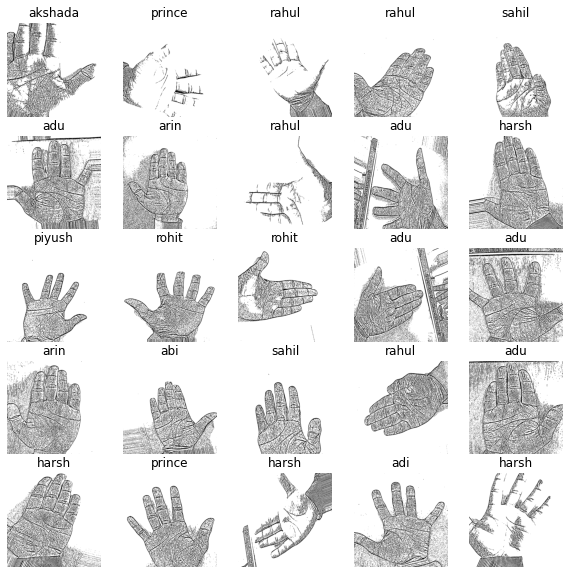

In [32]:
show_25_images(train_image,train_label)

## Now we have our data prepared for model, let's Create a model

In [33]:
# Defining INPUT and OUTPUT Shape
INPUT_SHAPE = [None, IMGSIZE,IMGSIZE]
OUTPUT_SHAPE = len(unique_labels)
INPUT_SHAPE,OUTPUT_SHAPE

([None, 1000, 1000], 12)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

INPUT_SHAPE = (1000, 1000, 1)
OUTPUT_SHAPE = 12

model = tf.keras.Sequential(name="Palmprintdetection")
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(OUTPUT_SHAPE, activation='softmax'))
model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model.summary()


Model: "Palmprintdetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1000, 1000, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 500, 500, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 500, 500, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 250, 250, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4000000)           0         
                                                                 
 dense (Dense)               (None, 12)         

## Lets Create some callbacks 
callbacks are helper functions a model can use during training to do such thing as saving the progres, check its' progress or stop training early if the model stops improving

we'll create two call backs:

One is tensorboard which helps track ours models progress
Early stopping call backs to stop model for training too long
Tensorboard callback
To stepup a tensorboard callback , we need to do 3 things:

Load the Tensorboard noteboon extension
Create a Tensorboard callback which is able to save logs to a directory and pass it to our model's fit() function
Visualize our models training logs with %tensorboard magic function (we'll do this after model training)
Early stopping callback
it prevents overfitting of the model

In [35]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [36]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    #Create a log directory for storing Tensorboard logs
    logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [38]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                  patience = 3) #see 3 epochs before stoping if it stops improving

# Train the model

In [39]:
tensorboard = create_tensorboard_callback()

In [40]:
NUM_EPOCHS = 100

In [41]:
model.fit(x=training_data,
            epochs= NUM_EPOCHS,
            callbacks = [tensorboard, early_stopping])

Epoch 1/100
79/79 [==============================] - 1586s 20s/step - loss: 2535.6841 - accuracy: 0.1107
Epoch 2/100
79/79 [==============================] - 1484s 19s/step - loss: 3.0735 - accuracy: 0.4656
Epoch 3/100
79/79 [==============================] - 1485s 19s/step - loss: 0.1678 - accuracy: 0.9546
Epoch 4/100
79/79 [==============================] - 1470s 19s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 5/100
79/79 [==============================] - 1462s 19s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/100
79/79 [==============================] - 1457s 18s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 7/100
79/79 [==============================] - 1569s 20s/step - loss: 8.7627e-04 - accuracy: 1.0000


## Saving the model

In [43]:
model.save("models/Palm-prediction-model-mean-thresholding.h5")

## So First model with Mean Adaptive Thresholding is Trained, so let's check its prediction and some Visualization of predictions

**Import custom images from folder this images are of `rohit` let's see how well our model can predict them**

In [196]:
#Load images and there paths
CUSTOM = "custom-images"
custom_images_paths = []
for path in os.listdir(CUSTOM): 
    custom_images_paths.append(os.path.join(CUSTOM,path))

custom_images_paths

['custom-images\\image_rohit1.jpg', 'custom-images\\image_rohit2.jpg']

## our images

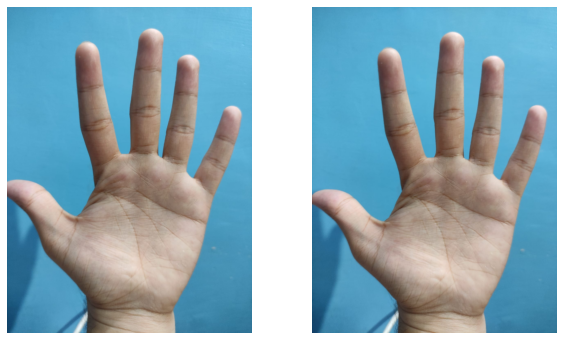

In [197]:
plt.figure(figsize=(10,6))
for i in range(1,len(custom_images_paths)+1): 
    plt.subplot(1,len(custom_images_paths),i)
    image = plt.imread(custom_images_paths[i-1])
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [198]:
X_test = process_images(custom_images_paths)

#### Preprocessed image

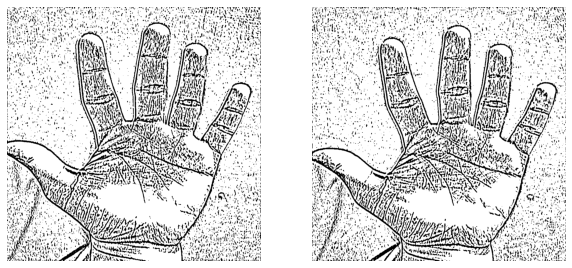

In [199]:
plt.figure(figsize=(10,6))
for i in range(1,len(custom_images_paths)+1): 
    plt.subplot(1,len(custom_images_paths),i)
    plt.imshow(X_test[i-1],cmap='gray')
    plt.axis('off')
plt.show()

In [200]:
X_test = tf.convert_to_tensor(X_test,dtype=tf.uint8)

In [201]:
testing_batch = create_data_batches(X_test,test_data=True)

Creating test data batches...


In [202]:
testing_batch

<_BatchDataset element_spec=TensorSpec(shape=(None, 1000, 1000), dtype=tf.uint8, name=None)>

### Let's do some predictions

In [203]:
y_preds = model.predict(testing_batch)

1/1 [==============================] - 0s 284ms/step


In [204]:
y_preds #this are probability values per class

array([[1.2315079e-01, 4.3833009e-03, 4.0337751e-03, 1.3818981e-02,
        6.6815398e-04, 5.8609672e-02, 1.1346339e-03, 3.7268732e-05,
        8.3480239e-02, 7.0474249e-01, 1.2464416e-03, 4.6941536e-03],
       [2.3029968e-02, 4.3423392e-04, 2.7453825e-05, 1.0540128e-02,
        1.7799465e-03, 2.6351751e-03, 2.4766727e-05, 2.2761431e-07,
        9.5024997e-01, 1.1274203e-02, 3.8107609e-07, 3.5421301e-06]],
      dtype=float32)

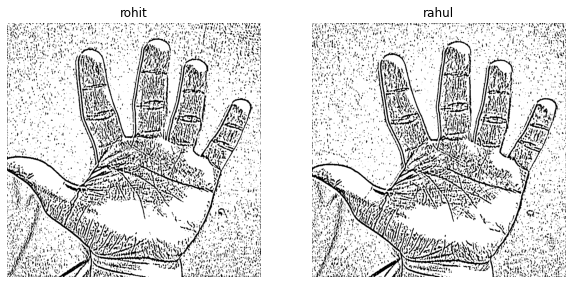

In [207]:
plt.figure(figsize=(10,6))
for i in range(1,len(custom_images_paths)+1): 
    plt.subplot(1,len(custom_images_paths),i)
    plt.imshow(X_test[i-1],cmap='gray')
    plt.title(np.array(unique_labels)[np.argmax(y_preds,axis=1)[i-1]])
    plt.axis('off')
plt.show()

## On Custom data our model is performing okk, Let's try it on dataset we already have

In [210]:
len(All_image_paths)

2511

In [265]:
testing_data_batch = create_data_batches(X[100:1000],y[100:1000])

Creating training data batches....


In [266]:
y_preds = model.predict(testing_data_batch)

29/29 [==============================] - 104s 4s/step


In [267]:
def unbatchify(data):
    images = []
    labels = []

    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_labels[np.argmax(label)])
    return images, labels

In [283]:

# Turn predition probability into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
    """
    Turns an array of predition probabilities into a lable
    """
    return np.array(unique_labels)[np.argmax(prediction_probabilities,axis=0)]

In [284]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], get_pred_label(labels[n]), images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    #plot iamge & remove ticks
    plt.imshow(image,cmap='gray')
    plt.xticks([])
    plt.yticks([])

    # Change the color
    if pred_label == true_label:
        color="green"
    else:
        color='red'

        # change the title to be predited, probality of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                  np.max(pred_prob)*100,
                                  true_label), color = color)
     

In [285]:
test_images, test_labels = unbatchify(testing_data_batch)


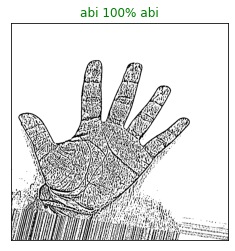

In [294]:
plot_pred(y_preds,test_labels,test_images,n=745)

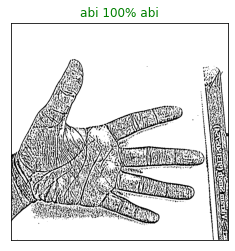

In [292]:
plot_pred(y_preds,test_labels,test_images,n=45)

## It is True that this model is overfitted on training data but that is okk since we this is a sign that our model is learning
**When we'll have large number of image our model will perform far better**